https://medium.com/@kansara.anjul/function-approximation-with-artificial-neural-networks-in-pytorch-d94d7e2282cf

In [36]:
import numpy as np
import torch

In [37]:
print(torch.cuda.is_available())

False


Аппроксимируемая функция: $sin(x + 2\cdot y)\cdot e^{-(2\cdot x + y)^2}$  Область определения: $[-10, 10]$ по $х$ и $у$ 20000 точек значений функции

In [38]:
x = torch.linspace(-10, 10, 20000)
y = torch.linspace(-10, 10, 20000)
z = torch.stack([x, y])
z

tensor([[-10.0000,  -9.9990,  -9.9980,  ...,   9.9980,   9.9990,  10.0000],
        [-10.0000,  -9.9990,  -9.9980,  ...,   9.9980,   9.9990,  10.0000]])

In [39]:
z = z.reshape(20000, 2)

In [40]:
f = np.sin(x + 2 * y) * np.exp(0 - np.power((2 * x + y), 2))
f

tensor([0., 0., 0.,  ..., -0., -0., -0.])

In [41]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(2, 32)   # 2 input, 32 hidden neurons in layer 1
        self.hidden2 = torch.nn.Linear(32, 64)  # 32 input, 64 hidden neurons in layer 2
        self.output = torch.nn.Linear(64, 1)    # 64 input, 1 output

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x


In [42]:
net = Net()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)  # Using Adam optimizer
losses = []

for epoch in range(2000):
    optimizer.zero_grad()
    outputs = net(z)
    loss = criterion(outputs.squeeze(), f)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        losses.append(loss.detach().numpy())
        print("Epoch {}: Loss = {}".format(epoch, loss.detach().numpy()))

Epoch 0: Loss = 0.2320607453584671
Epoch 100: Loss = 0.0034536102320998907
Epoch 200: Loss = 0.003251593792811036
Epoch 300: Loss = 0.0031173171009868383
Epoch 400: Loss = 0.0029806955717504025
Epoch 500: Loss = 0.0028329596389085054
Epoch 600: Loss = 0.0026968084275722504
Epoch 700: Loss = 0.002610074356198311
Epoch 800: Loss = 0.0025395345874130726
Epoch 900: Loss = 0.002543032867833972
Epoch 1000: Loss = 0.0024927465710788965
Epoch 1100: Loss = 0.0024635246954858303
Epoch 1200: Loss = 0.002476013032719493
Epoch 1300: Loss = 0.002520613372325897
Epoch 1400: Loss = 0.0024496831465512514
Epoch 1500: Loss = 0.002433527261018753
Epoch 1600: Loss = 0.0024675976019352674
Epoch 1700: Loss = 0.0024331037420779467
Epoch 1800: Loss = 0.0023922305554151535
Epoch 1900: Loss = 0.0023880600929260254


In [43]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

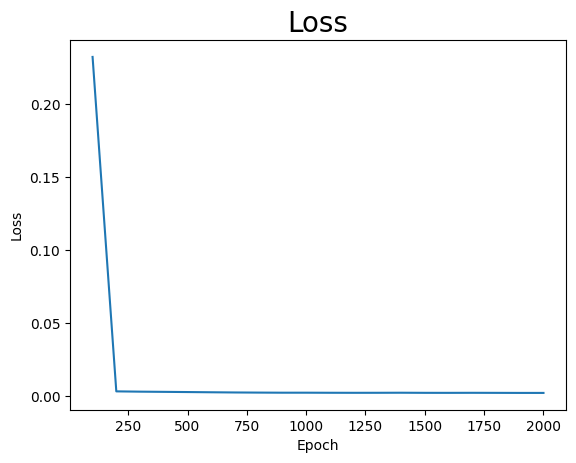

In [46]:
plt.plot(np.arange(100, 100 * (len(losses) + 1), 100), losses)
plt.title("Loss", fontdict={"size": 20}, loc="center")
plt.xlabel("Epoch", fontdict={"size": 10})
plt.ylabel("Loss", fontdict={"size": 10})

Text(0, 0.5, 'Loss, log()')

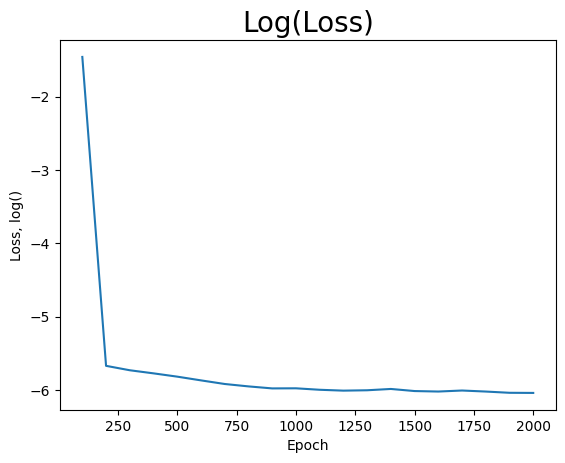

In [47]:
plt.plot(np.arange(100, 100 * (len(losses) + 1), 100), np.log(losses))
plt.title("Log(Loss)", fontdict={"size": 20}, loc="center")
plt.xlabel("Epoch", fontdict={"size": 10})
plt.ylabel("Loss, log()", fontdict={"size": 10})